In [2]:
#!/usr/bin/env python
#DBR updated Jan9 2023

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import resource
import seaborn as sns
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots

sns.set_style("ticks")


In [3]:
#upload AMP data!!
pkpd = pd.read_csv('data/adata-pk.csv')
vl = pd.read_csv('data/adata-viral-loads.csv')

#add the clade info
clade_df = pd.read_csv('data/subtype_final_noptid.csv')
clade_df['pub_id']=clade_df['pubid']
vlclade = pd.merge(vl,clade_df,on='pub_id')


In [4]:
#some chosen colors

cl=['C3','T1','T2']

czl=['gray','lightblue','tab:green']

ic80choice = 'gmt80ls' #other options for this



C3 N= 62
T1 N= 53
T2 N= 43


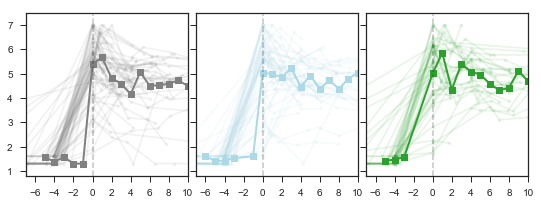

In [5]:
#plot viral loads by study group

fig,axs=plt.subplots(1,3,figsize=(9,3),sharex=True,sharey=True)
for ig,grp in enumerate(['C3','T1','T2']):

    tdf = vl[vl['rx_code']==grp]
    
    print(grp,'N=',len(tdf['pub_id'].unique()))
    for pid in tdf['pub_id'].unique():
        
        tdf2=tdf[tdf['pub_id']==pid]
        t = tdf2['days_fp'].values
        V = tdf2['log10vl'].values
        axs[ig].plot(t/7,V,marker='.',color=czl[ig],alpha=0.1)

    tdfa=tdf[(tdf['days_fp']>-40) & (tdf['days_fp']<80) ]

    tdfa=tdfa[['pub_id','days_fp','log10vl']]
    tdfap = tdfa.pivot_table(index='days_fp')

    tdfap['week']=np.round(tdfap.index.values/7)

    avgl=[]
    for w in tdfap['week'].unique():

        tdf3=tdfap[tdfap['week']==w]
        avgv = np.nanmean(tdf3['log10vl'])

        if len(tdf3)>0:
            avgl.append([w,avgv])

    avga=np.array(avgl)
    axs[ig].plot(avga[:,0],avga[:,1],color=czl[ig],lw=2,marker='s')
    
    axs[ig].axvline(0,ls='--',color='k',alpha=0.2)
        
axs[0].set_ylim([0.8,7.5])
axs[0].set_xticks(np.arange(-10,11,2))
axs[0].set_xlim([-7,10])
plt.subplots_adjust(wspace=0.05)

plt.savefig('figures/vl_raw_bygroup.pdf',dpi=600)

N= 17
N= 45
N= 9
N= 87


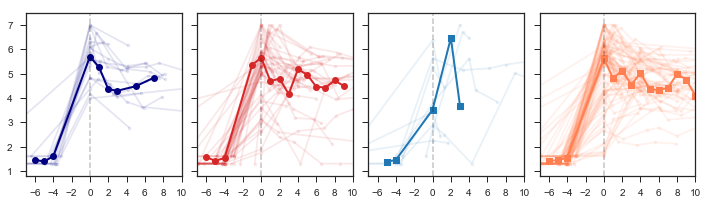

In [6]:
#plot viral loads by study group

vlps = vl[(vl['gmt80ls']<1) & (vl['rx_code']=='C3')] #placebo sensitive
vlpr = vl[(vl['gmt80ls']>1) & (vl['rx_code']=='C3')] #placebo resistant
vlts = vl[(vl['gmt80ls']<1) & (vl['rx_code']!='C3')] #treated sensitive
vltr = vl[(vl['gmt80ls']>1) & (vl['rx_code']!='C3')] #treated resistant

fig,axs=plt.subplots(1,4,figsize=(12,3),sharex=True,sharey=True)

mzl=['o','o','s','s']
czl2=['navy','tab:red','tab:blue','coral']

for ii,tdf in enumerate([vlps,vlpr,vlts,vltr]):
    
    print('N=',len(tdf['pub_id'].unique()))
    for pid in tdf['pub_id'].unique():
        
        tdf2=tdf[tdf['pub_id']==pid]
        t = tdf2['days_fp'].values
        V = tdf2['log10vl'].values
        axs[ii].plot(t/7,V,marker='.',color=czl2[ii],alpha=0.1)

    tdfa=tdf[(tdf['days_fp']>-40) & (tdf['days_fp']<80) ]

    tdfa=tdfa[['pub_id','days_fp','log10vl']]
    tdfap = tdfa.pivot_table(index='days_fp')

    tdfap['week']=np.round(tdfap.index.values/7)

    avgl=[]
    for w in tdfap['week'].unique():

        tdf3=tdfap[tdfap['week']==w]
        avgv = np.nanmean(tdf3['log10vl'])

        if len(tdf3)>1:
            avgl.append([w-1,avgv])

    avga=np.array(avgl)
    axs[ii].plot(avga[:,0],avga[:,1],color=czl2[ii],lw=2,marker=mzl[ii])
    
    axs[ii].axvline(0,ls='--',color='k',alpha=0.2)
        
axs[0].set_ylim([0.8,7.5])
axs[0].set_xticks(np.arange(-10,11,2))
axs[0].set_xlim([-7,10])
plt.subplots_adjust(wspace=0.1)

plt.savefig('figures/vl_raw_byresistantgrp.pdf',dpi=600)

N= 17
N= 45
N= 9
N= 87


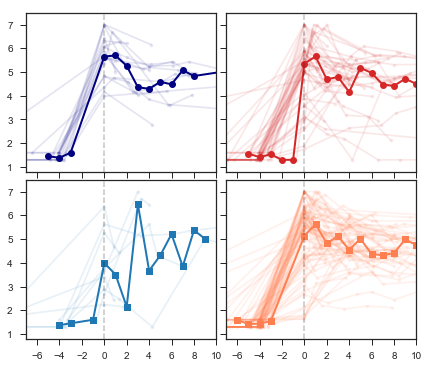

In [7]:
#plot viral loads by study group

vlps = vl[(vl['gmt80ls']<1) & (vl['rx_code']=='C3')] #placebo sensitive
vlpr = vl[(vl['gmt80ls']>1) & (vl['rx_code']=='C3')] #placebo resistant
vlts = vl[(vl['gmt80ls']<1) & (vl['rx_code']!='C3')] #treated sensitive
vltr = vl[(vl['gmt80ls']>1) & (vl['rx_code']!='C3')] #treated resistant

fig,axs=plt.subplots(2,2,figsize=(7,6),sharex=True,sharey=True)

mzl=['o','o','s','s']

fpl=[]
v2l=[]
v4l=[]
v28l=[]
for ii,tdf in enumerate([vlps,vlpr,vlts,vltr]):
    
    ax=axs[int(ii/2)][ii%2]
    print('N=',len(tdf['pub_id'].unique()))
    for pid in tdf['pub_id'].unique():
        
        tdf2=tdf[tdf['pub_id']==pid]
        t = tdf2['days_fp'].values
        V = tdf2['log10vl'].values
        ax.plot(t/7,V,marker='.',color=czl2[ii],alpha=0.1)

    tdfa=tdf[(tdf['days_fp']>-40) & (tdf['days_fp']<80) ]

    tdfa=tdfa[['pub_id','days_fp','log10vl']]
    tdfap = tdfa.pivot_table(index='days_fp')

    tdfap['week']=np.round(tdfap.index.values/7)

    fpl.append(tdfa[tdfa['days_fp']==0]['log10vl'].values)
    v2l.append(tdfa[(tdfa['days_fp']>0) & (tdfa['days_fp']<21)]['log10vl'].values)
    v4l.append(tdfa[(tdfa['days_fp']>21) & (tdfa['days_fp']<56)]['log10vl'].values)
    
    avgl=[]
    for w in tdfap['week'].unique():

        tdf3=tdfap[tdfap['week']==w]
        avgv = np.nanmean(tdf3['log10vl'])

        if len(tdf3)>0:
            avgl.append([w,avgv])

    avga=np.array(avgl)
    ax.plot(avga[:,0],avga[:,1],color=czl2[ii],lw=2,marker=mzl[ii])
    
    ax.axvline(0,ls='--',color='k',alpha=0.2)
        
ax.set_ylim([0.8,7.5])
ax.set_xticks(np.arange(-10,11,2))
ax.set_xlim([-7,10])
plt.subplots_adjust(wspace=0.05,hspace=0.05)

plt.savefig('figures/vl_raw_byresistantgrp2.pdf',dpi=600)

significant should be < 0.008333333333333333
0 1 MannwhitneyuResult(statistic=272.5, pvalue=0.0419888690712503)
0 2 MannwhitneyuResult(statistic=25.0, pvalue=0.0029912676057866124)
0 3 MannwhitneyuResult(statistic=628.5, pvalue=0.1656324177333976)
1 2 MannwhitneyuResult(statistic=126.0, pvalue=0.03885577070939094)
1 3 MannwhitneyuResult(statistic=1694.5, pvalue=0.10375409546084985)
2 3 MannwhitneyuResult(statistic=219.0, pvalue=0.01529334761118807)


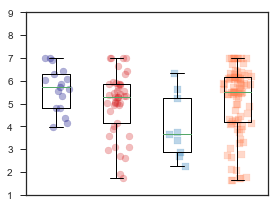

In [8]:
jit=0.1

#first positive
plt.figure(figsize=(4,3))
plt.boxplot(fpl)
for ii,yy in enumerate(fpl):
    plt.scatter(np.random.normal(ii+1,jit,len(yy)),yy,c=czl2[ii],alpha=0.3,marker=mzl[ii])
    #print(np.mean(yy),np.std(yy))
plt.xticks([])
plt.ylim([1,9])
plt.tight_layout()
plt.savefig('figures/boxes_fp.pdf',dpi=600)

print('significant should be <',0.05/6)
print(0,1,st.mannwhitneyu(fpl[0],fpl[1]))
print(0,2,st.mannwhitneyu(fpl[0],fpl[2]))
print(0,3,st.mannwhitneyu(fpl[0],fpl[3]))
print(1,2,st.mannwhitneyu(fpl[1],fpl[2]))
print(1,3,st.mannwhitneyu(fpl[1],fpl[3]))
print(2,3,st.mannwhitneyu(fpl[2],fpl[3]))


In [9]:
pd.read_csv('data/fp-pool-means.csv')

,Group,Mean First Positive (95pct CI)
0,"Placebo, IC80 < 1 mcg/mL","5.33 (4.55, 6.11)"
1,"Placebo, IC80 >= 1 mcg/mL","4.73 (4.15, 5.31)"
2,"VRC01 (Pooled), IC80 < 1 mcg/mL","3.77 (2.75, 4.79)"
3,"VRC01 (Pooled), IC80 >= 1 mcg/mL","4.86 (4.34, 5.38)"


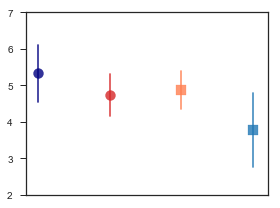

In [14]:
jit=0.1

bryl=[[5.33,4.55,6.11],[4.73,4.15,5.31],[4.86,4.34,5.38],[3.77,2.75,4.79],]

#first positive
plt.figure(figsize=(4,3))
for ii,yl in enumerate(bryl):
    plt.scatter(ii+1,yl[0],c=['navy','tab:red','coral','tab:blue'][ii],alpha=0.8,marker=mzl[ii],s=100)
    plt.plot([ii+1,ii+1],[yl[1],yl[2]],c=['navy','tab:red','coral','tab:blue'][ii],alpha=0.8)
    #print(np.mean(yy),np.std(yy))
plt.xticks([])
plt.ylim([2,7])
plt.tight_layout()
plt.savefig('figures/dots_fp.pdf',dpi=600)



significant should be < 0.008333333333333333
0 1 MannwhitneyuResult(statistic=233.0, pvalue=0.49557027794946257)
0 2 MannwhitneyuResult(statistic=5.0, pvalue=0.0049039878401189885)
0 3 MannwhitneyuResult(statistic=374.0, pvalue=0.4461725440301638)
1 2 MannwhitneyuResult(statistic=22.0, pvalue=0.002769503391349847)
1 3 MannwhitneyuResult(statistic=1221.0, pvalue=0.42849622598139836)
2 3 MannwhitneyuResult(statistic=32.0, pvalue=0.0015820886380079567)


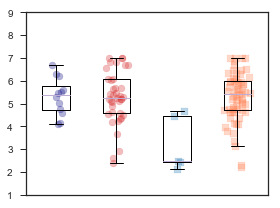

In [79]:
#within 3 weeks after first positive
plt.figure(figsize=(4,3))
plt.boxplot(v2l)
for ii,yy in enumerate(v2l):
    plt.scatter(np.random.normal(ii+1,jit,len(yy)),yy,c=czl2[ii],alpha=0.3,marker=mzl[ii])
plt.xticks([])
plt.ylim([1,9])
plt.tight_layout()
plt.savefig('figures/boxes_<3.pdf',dpi=600)

print('significant should be <',0.05/6)
print(0,1,st.mannwhitneyu(v2l[0],v2l[1]))
print(0,2,st.mannwhitneyu(v2l[0],v2l[2]))
print(0,3,st.mannwhitneyu(v2l[0],v2l[3]))
print(1,2,st.mannwhitneyu(v2l[1],v2l[2]))
print(1,3,st.mannwhitneyu(v2l[1],v2l[3]))
print(2,3,st.mannwhitneyu(v2l[2],v2l[3]))


significant should be < 0.008333333333333333
0 1 MannwhitneyuResult(statistic=587.0, pvalue=0.40177576280036853)
0 2 MannwhitneyuResult(statistic=74.0, pvalue=0.21475449318577983)
0 3 MannwhitneyuResult(statistic=1170.0, pvalue=0.33267173332905026)
1 2 MannwhitneyuResult(statistic=178.0, pvalue=0.23706356866464562)
1 3 MannwhitneyuResult(statistic=2846.5, pvalue=0.4784833559335087)
2 3 MannwhitneyuResult(statistic=351.0, pvalue=0.19022296821627116)


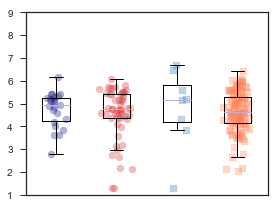

In [80]:
#after 3 weeks after first positive
plt.figure(figsize=(4,3))
plt.boxplot(v4l)
for ii,yy in enumerate(v4l):
    plt.scatter(np.random.normal(ii+1,jit,len(yy)),yy,c=czl2[ii],alpha=0.3,marker=mzl[ii])
plt.ylim([1,9])
plt.xticks([])
plt.tight_layout()
plt.savefig('figures/boxes_after3.pdf',dpi=600)

print('significant should be <',0.05/6)
print(0,1,st.mannwhitneyu(v4l[0],v4l[1]))
print(0,2,st.mannwhitneyu(v4l[0],v4l[2]))
print(0,3,st.mannwhitneyu(v4l[0],v4l[3]))
print(1,2,st.mannwhitneyu(v4l[1],v4l[2]))
print(1,3,st.mannwhitneyu(v4l[1],v4l[3]))
print(2,3,st.mannwhitneyu(v4l[2],v4l[3]))

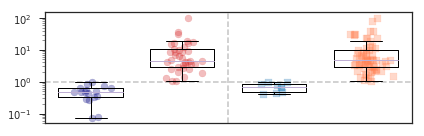

In [81]:
plt.figure(figsize=(6,2))
#sns.stripplot([1,2,3,4],[vlps['gmt80ls'].unique(),vlpr['gmt80ls'].unique(),vlts['gmt80ls'].unique(),vltr['gmt80ls'].unique()])
plt.boxplot([vlps['gmt80ls'].unique(),vlpr['gmt80ls'].unique(),vlts['gmt80ls'].unique(),vltr['gmt80ls'].unique()],widths=0.7)
for ii,tdf in enumerate([vlps,vlpr,vlts,vltr]):
    yy=tdf['gmt80ls'].unique()
    #xx=simple_beeswarm(yy,nbins=30)
    #plt.scatter(xx+ii+1,yy,c=czl2[ii],alpha=0.3,marker=mzl[ii])
    plt.scatter(np.random.normal(ii+1,jit,len(yy)),yy,c=czl2[ii],alpha=0.3,marker=mzl[ii])
plt.axvline(2.5,ls='--',color='k',alpha=0.2)
plt.axhline(1,ls='--',color='k',alpha=0.2)
plt.semilogy()
plt.xticks([])
plt.tight_layout()
plt.savefig('figures/IC80s_byresistantgrp.pdf',dpi=600)

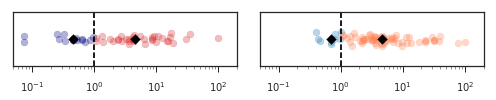

In [82]:
plt.figure(figsize=(7,1.5))

plt.subplot(121)
#plt.boxplot([vlps['gmt80ls'].unique(),vlpr['gmt80ls'].unique()],widths=0.7,vert=False,positions=[1,1])
plt.semilogx()
plt.xlim([5e-2,2e2])
plt.ylim([0,2])
plt.axvline(1,color='k',ls='--')
plt.yticks([])

plt.subplot(122)
#plt.boxplot([vlts['gmt80ls'].unique(),vltr['gmt80ls'].unique()],widths=0.7,vert=False,positions=[1,1])
plt.semilogx()
plt.xlim([5e-2,2e2])
plt.ylim([0,2])
plt.axvline(1,color='k',ls='--')
plt.yticks([])

plt.subplot(121)
for ii,tdf in enumerate([vlps,vlpr]):
    yy=tdf['gmt80ls'].unique()
    plt.scatter(yy,np.random.normal(1,jit,len(yy)),c=czl2[ii],alpha=0.3,marker=mzl[ii])
    plt.scatter(np.median(yy),1,marker='D',color='k')
    
plt.subplot(122)
for ii,tdf in enumerate([vlts,vltr]):
    yy=tdf['gmt80ls'].unique()
    plt.scatter(yy,np.random.normal(1,jit,len(yy)),c=czl2[ii+2],alpha=0.3,marker=mzl[ii])
    plt.scatter(np.median(yy),1,marker='D',color='k')

plt.tight_layout()
plt.savefig('figures/IC80s_byresistantgrp2.pdf',dpi=600)

In [83]:
#st.mannwhitneyu(vlps['gmt80ls'].unique(),vlts['gmt80ls'].unique())
st.ttest_ind(vlps['gmt80ls'].unique(),vlts['gmt80ls'].unique(),equal_var=False)

Ttest_indResult(statistic=-2.301055129604083, pvalue=0.03386695555587425)

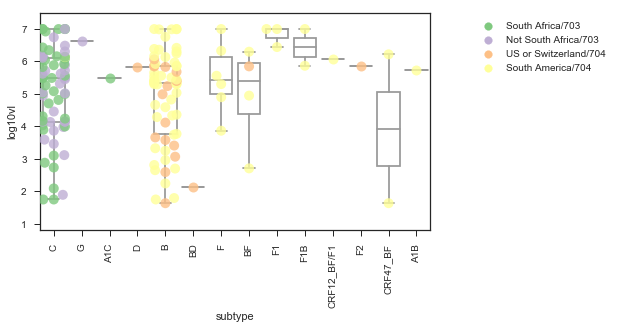

In [84]:
#plot by subtype and region, 2 ways

sns.set_palette('Accent')
vlclade_fp = vlclade[vlclade['days_fp']==0] #only first positives

plt.figure(figsize=(7,4))
sns.swarmplot(data=vlclade_fp,x='subtype',y='log10vl',hue='study_region_cat',marker='o',alpha=0.8,s=10)
#sns.stripplot(data=tdf,x='subtype',y='log10vl',hue='study_region_cat',marker='s',alpha=0.3)
sns.boxplot(data=vlclade_fp,x='subtype',y='log10vl',color='white')#,ax=axs[iv])
plt.xticks(rotation=90)
plt.ylim([0.8,7.5])
plt.legend(bbox_to_anchor=[1.1,1])

plt.savefig('figures/fp-clades-regions.pdf',dpi=600)

In [85]:
#do stats on this

vlcl=[]
for cl in vlclade_fp['subtype'].unique():
    vlcl.append(list(vlclade_fp[vlclade_fp['subtype']==cl]['log10vl'].values))

st.f_oneway(vlcl[0],vlcl[1],vlcl[2],vlcl[3],vlcl[4],vlcl[5],
           vlcl[6],vlcl[7],vlcl[8],vlcl[9],vlcl[10],vlcl[11],vlcl[12],vlcl[13])

#not normal
st.kruskal(vlcl[0],vlcl[1],vlcl[2],vlcl[3],vlcl[4],vlcl[5],
           vlcl[6],vlcl[7],vlcl[8],vlcl[9],vlcl[10],vlcl[11],vlcl[12],vlcl[13])

KruskalResult(statistic=16.220455335236554, pvalue=0.23743007889569231)

In [86]:
st.ttest_ind(vlclade_fp[vlclade_fp['subtype']=='B']['log10vl'],
             vlclade_fp[vlclade_fp['subtype']=='F1']['log10vl'],equal_var=False)

Ttest_indResult(statistic=-7.33298399257402, pvalue=0.00013866869444920847)

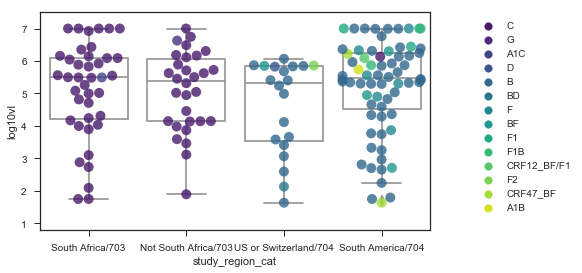

In [87]:
#another way

plt.figure(figsize=(7,4))
sns.boxplot(data=vlclade_fp,y='log10vl',x='study_region_cat',color='white')#,ax=axs[iv])
sns.swarmplot(data=vlclade_fp,hue='subtype',y='log10vl',x='study_region_cat',s=10,alpha=0.8,palette='viridis')#,ax=axs[iv])
plt.xticks(rotation=0)
plt.ylim([0.8,7.5])

plt.legend(bbox_to_anchor=[1.1,1])
plt.savefig('figures/fp-clades-regions2.pdf',dpi=600)

In [91]:
#do stats on this

vlgl=[]
for gl in vlclade_fp['study_region_cat'].unique():
    vlgl.append(list(vlclade_fp[vlclade_fp['study_region_cat']==gl]['log10vl'].values))

st.f_oneway(vlgl[0],vlgl[1],vlgl[2],vlgl[3])

#not normal
st.kruskal(vlgl[0],vlgl[1],vlgl[2],vlgl[3])

KruskalResult(statistic=3.5561376490078955, pvalue=0.31355391083033807)

SyntaxError: invalid syntax (<ipython-input-95-b8a8b98d1790>, line 1)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


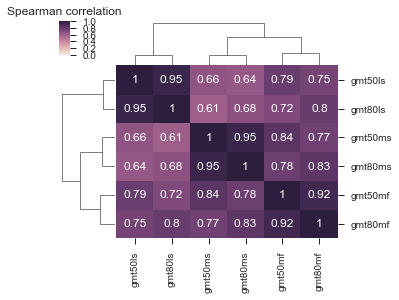

In [16]:
#Supp Fig 1, correlating most sensitive least sensitive and most frequent sequence ICs

#note
#gmt = geometric mean
#ms - most sensitive, mf - most frequent, ls - least sensitive

g=sns.clustermap(vl[vl['nisolates']>1][['gmt50ms', 'gmt80ms', 'gmt50ls', 'gmt80ls',
       'gmt50mf', 'gmt80mf']].corr(method='spearman'),annot=True,figsize=(5,4),vmin=0,vmax=1)
#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=12) # For x axis
#plt.setp(g.ax_heatmap.get_yticklabels(), rotation=90, fontsize=12) # For y axis
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)  # For y axis
plt.title('Spearman correlation')
#plt.tight_layout()
plt.savefig('figures/S1-ICcorrs_n>1.pdf',dpi=600)


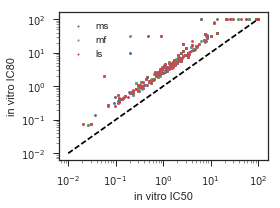

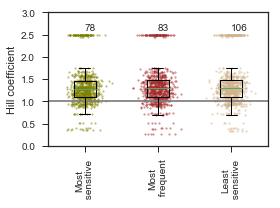

In [145]:
#Supp Fig 1, correlating most sensitive least sensitive and most frequent sequence ICs

sns.set_palette('deep')

#note
#gmt = geometric mean
#ms - most sensitive, mf - most frequent, ls - least sensitive

plt.figure(figsize=(4,3))
for gt in ['ms','mf','ls']:
    plt.scatter(vl['gmt50'+gt],vl['gmt80'+gt],label=gt,s=3)

plt.xlabel('in vitro IC50')
plt.ylabel('in vitro IC80')
plt.plot([0.01,100],[0.01,100],ls='--',color='k')
plt.loglog()
plt.legend()
plt.tight_layout()
plt.savefig('figures/S1-IC5080corrs.pdf',dpi=600)

plt.figure(figsize=(4,3))
plt.axhline(1,color='gray')
hil=[]
czz=['olive','brown','tan']
for ig,gt in enumerate(['ms','mf','ls']):
    hi=-np.log(4)/np.log(vl['gmt50'+gt]/vl['gmt80'+gt])
    infind=np.where([hi==-np.inf])[1]
    hi[infind]=2.5
    hil.append(hi)
    plt.scatter(np.random.normal(1,0.1,len(hi))+ig,hi,label=gt,s=3,alpha=0.5,c=czz[ig])
    plt.annotate(str(len(infind)),[1+ig,2.6],)

plt.boxplot(hil)

plt.ylabel('Hill coefficient')
plt.xticks([1,2,3],['Most\n sensitive','Most\n frequent','Least\n sensitive'],rotation=90)
plt.xlim([0.5,3.5])
#plt.semilogy()
plt.ylim([0,3])
plt.tight_layout()
plt.savefig('figures/S1-hillslope.pdf',dpi=600)
